# 1. Load Data and Sanity Check

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sys.path.append(os.path.abspath(os.path.join('..')))

from src.data_loader import load_data
df = load_data()

print(f"Data Loaded: {df.shape}")

2026-01-08 15:32:38,549 - INFO - Downloading mlg-ulb/creditcardfraud from Kaggle...


Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


2026-01-08 15:34:01,465 - INFO - Download complete.
2026-01-08 15:34:02,290 - INFO - File saved to data/creditcard.parquet
2026-01-08 15:34:02,292 - INFO - Loading data from data/creditcard.parquet...


Data Loaded: (284807, 31)


In [2]:
df.describe()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
print(df.isnull().sum().max())

0


# 2. Check for Data Imbalance

2026-01-08 15:34:10,122 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-01-08 15:34:10,185 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


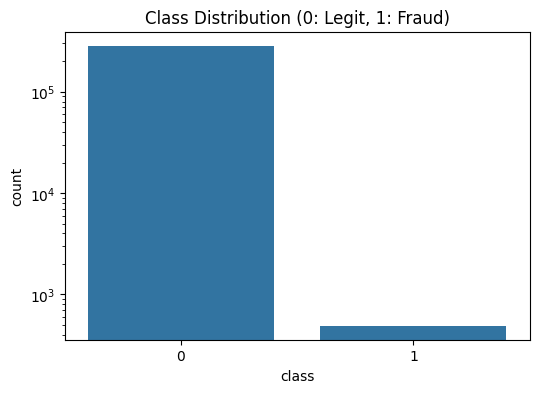

class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title("Class Distribution (0: Legit, 1: Fraud)")
plt.yscale('log') 
plt.show()
print(df['class'].value_counts(normalize=True))

Data is heavily imbalanced (0.17%), requiring sampling strategies later

# 3. EDA

## 3.1 Time-based Analysis

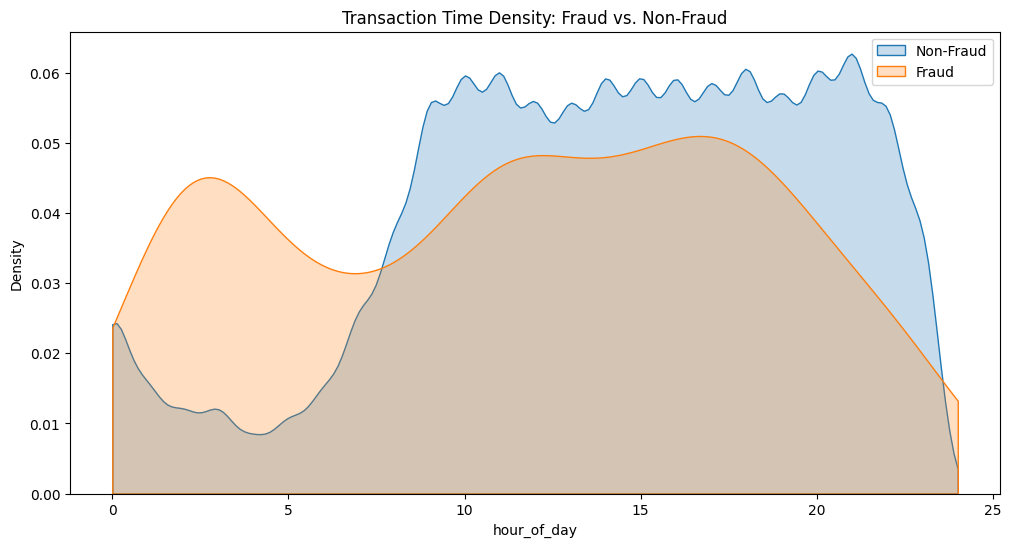

In [5]:
df['hour_of_day'] = df['time'].apply(lambda x: np.floor(x / 3600) % 24)
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['class'] == 0], x='hour_of_day', clip=(0,24), fill=True, label='Non-Fraud', common_norm=False)
sns.kdeplot(data=df[df['class'] == 1], x='hour_of_day', clip=(0,24), fill=True, label='Fraud', common_norm=False)
plt.title("Transaction Time Density: Fraud vs. Non-Fraud")
plt.legend()
plt.show()

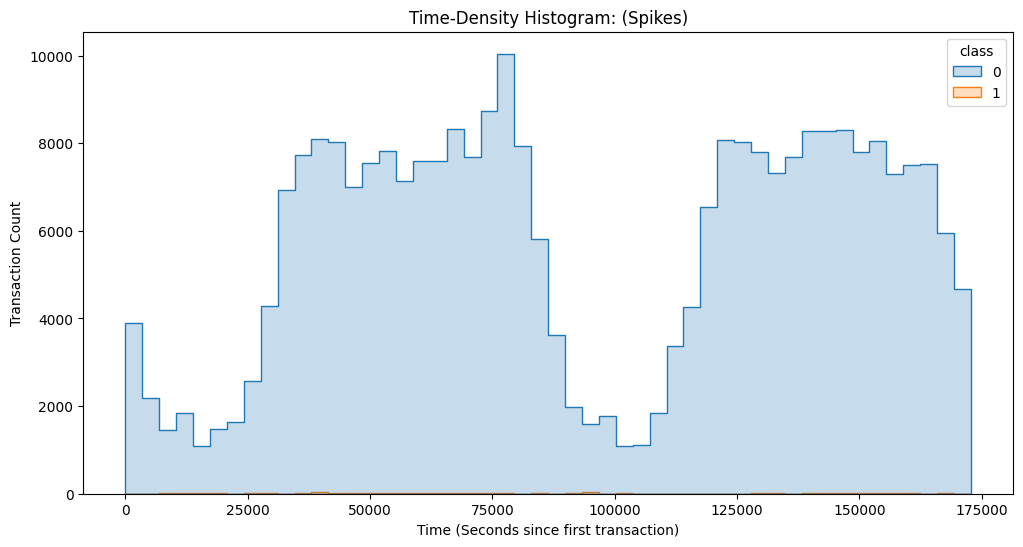

In [21]:
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df,
    x='time',
    hue='class',
    bins=50,       
    stat='count',  
    common_norm=False, 
    palette=['#1f77b4', '#ff7f0e'],
    element="step" 
)

plt.title('Time-Density Histogram: (Spikes)')
plt.xlabel('Time (Seconds since first transaction)')
plt.ylabel('Transaction Count')
plt.show()

## 3.2 Transaction Amount Analysis

2026-01-08 15:34:16,420 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-01-08 15:34:16,489 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


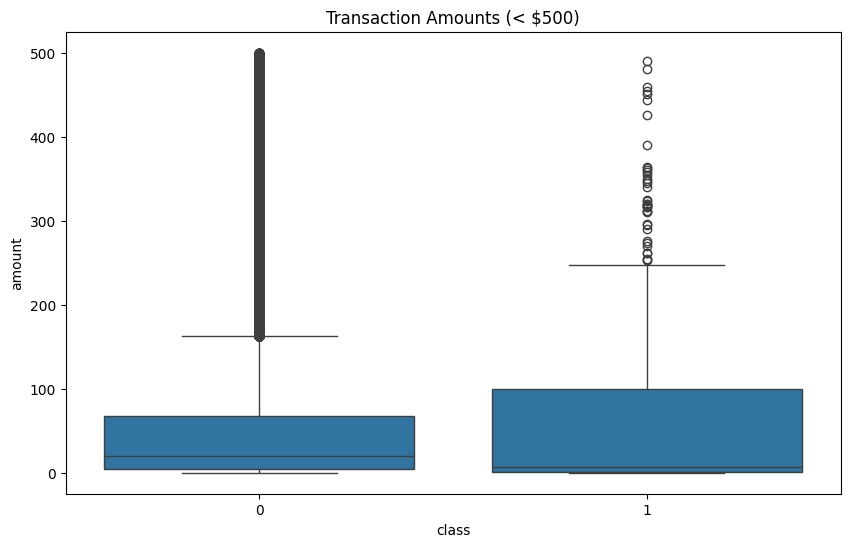

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='amount', data=df[df['amount'] < 500])
plt.title("Transaction Amounts (< $500)")
plt.show()

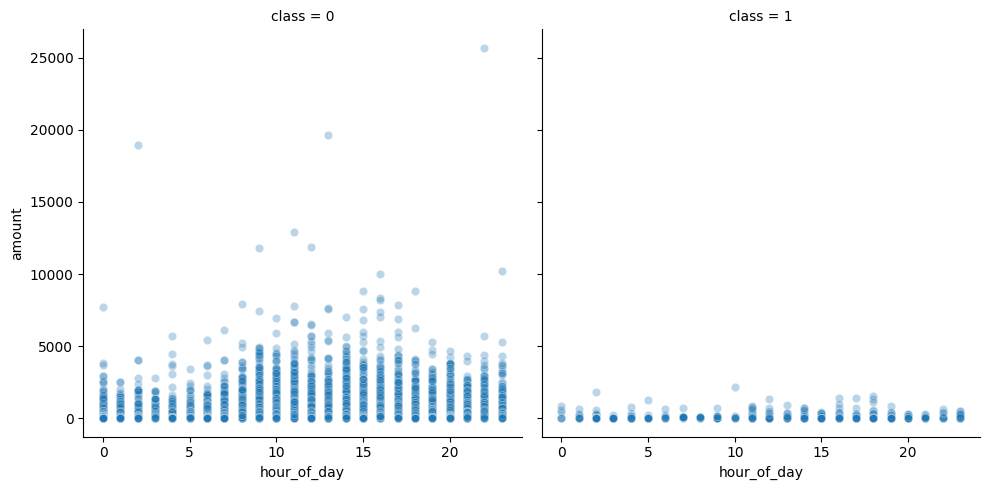

In [22]:
sns.relplot(
    data=df, 
    x="hour_of_day", 
    y="amount", 
    col="class", # Splits into two columns
    kind="scatter", 
    alpha=0.3
)

High-value fraud mimics high-value normal spending; Amount alone is not a separator.

## 3.3 Feature Analysis

Top 5 Positive Correlation
v17    0.326481
v14    0.302544
v12    0.260593
v10    0.216883
v16    0.196539
v3     0.192961
Name: class, dtype: float64
Top 5 Negative Correlation
v22    0.000805
v23    0.002685
v25    0.003308
v15    0.004223
v26    0.004455
v13    0.004570
Name: class, dtype: float64


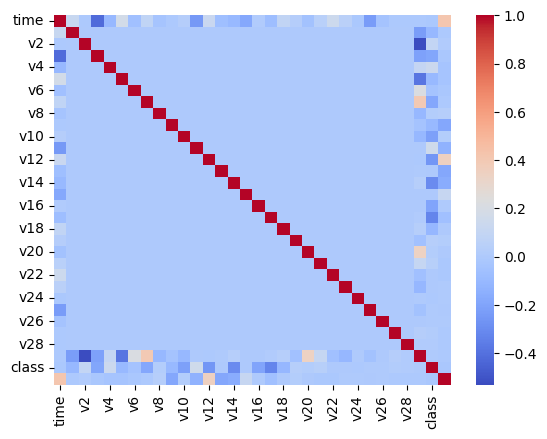

In [7]:
sns.heatmap(df.corr(), cmap='coolwarm')
corr_matrix = df.corr()['class'].drop('class')
print(f"Top 5 Positive Correlation\n{corr_matrix.abs().sort_values(ascending=False).head(6)}")
print(f"Top 5 Negative Correlation\n{corr_matrix.abs().sort_values(ascending=True).head(6)}")

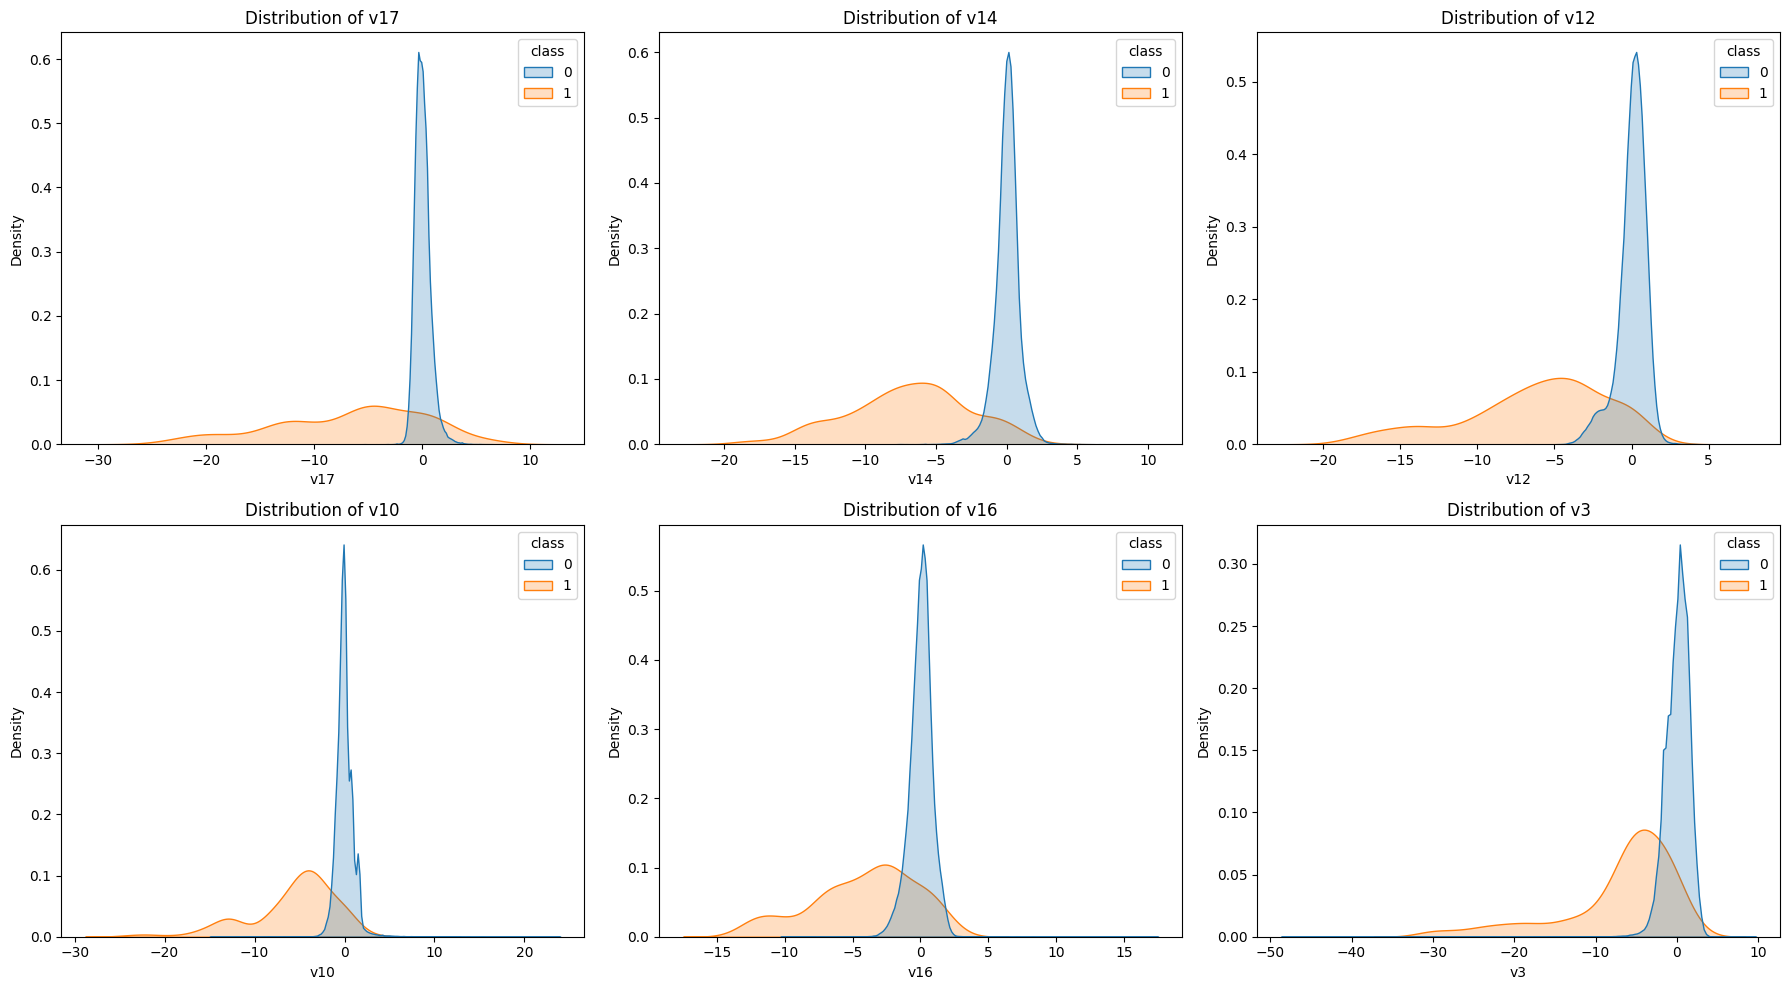

In [9]:
top_6_features = corr_matrix.abs().sort_values(ascending=False).head(6).index.to_list()
f, axes = plt.subplots(2, 3, figsize = (18,10))
for i, feature in enumerate(top_6_features):
    row = i // 3
    col = i % 3
    sns.kdeplot(data = df, x = feature, hue='class', fill=True, common_norm = False, ax=axes[row,col])
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


Since the distributions of features are skewed and bimodal, Kolmogorov-Smirnov (KS) Test will be the best choice to measure dissimilarities between Fraud and Non-Fraud Classes

In [23]:
from scipy.stats import ks_2samp
import pandas as pd

fraud_df = df[df['class'] == 1]
normal_df = df[df['class'] == 0]

ks_results = []

features = [col for col in df.columns if 'v' in col] 

for col in features:
    statistic, p_value = ks_2samp(fraud_df[col], normal_df[col])
    
    ks_results.append({
        'Feature': col,
        'KS_Statistic': statistic, 
        'P_Value': p_value        
    })

ks_df = pd.DataFrame(ks_results)
ks_df = ks_df.sort_values(by='KS_Statistic', ascending=False).reset_index(drop=True)

print("Top 10 Features by KS Divergence:")
print(ks_df.head(10))

Top 10 Features by KS Divergence:
  Feature  KS_Statistic        P_Value
0     v14      0.842839   0.000000e+00
1     v10      0.804291   0.000000e+00
2     v12      0.783908  8.606624e-321
3      v4      0.766404  2.040642e-302
4     v11      0.756067  4.347507e-292
5     v17      0.745173  1.387411e-281
6      v3      0.703682  9.927580e-245
7     v16      0.686506  9.366543e-231
8      v7      0.660578  6.776862e-211
9      v2      0.633201  2.163895e-191


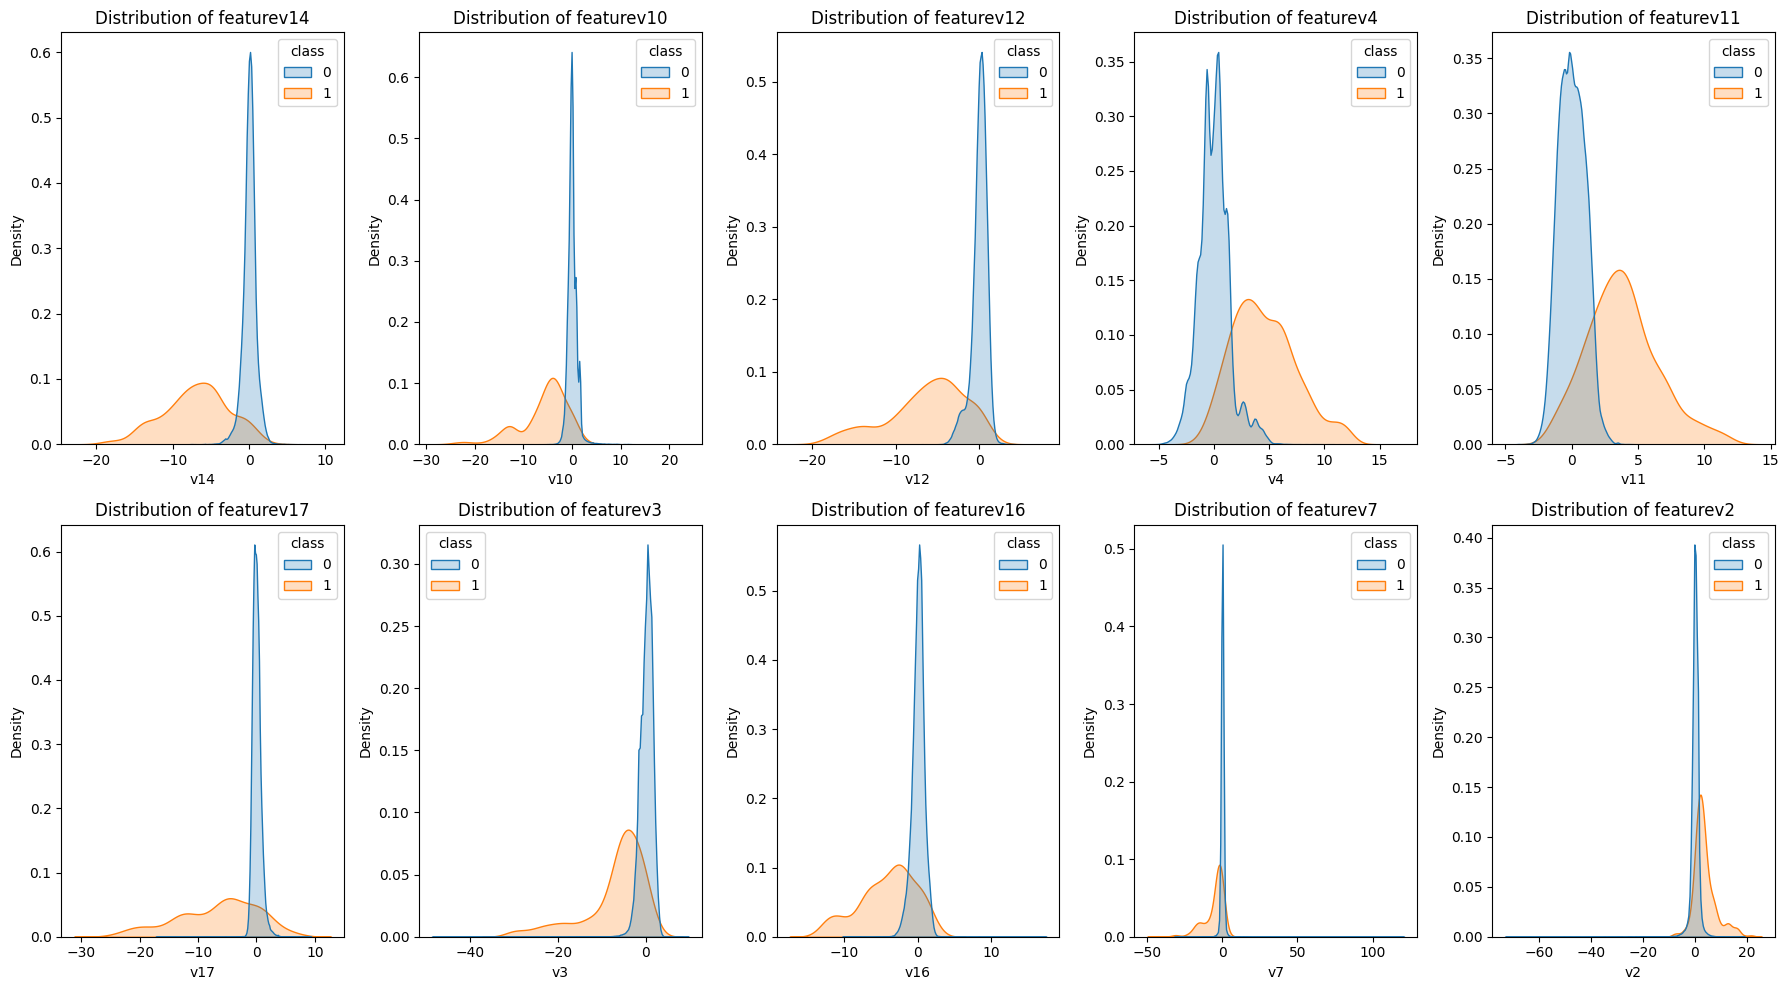

In [39]:
top_ks_features = ks_df.head(10)['Feature'].tolist()
f, axes = plt.subplots(2, 5, figsize = (18,10))
for i, feature in enumerate(top_ks_features):
    row = i // 5
    col = i % 5
    sns.kdeplot(data = df, x= feature, hue='class', fill=True, common_norm = False, ax=axes[row,col])
    axes[row, col].set_title(f'Distribution of feature{feature}')
plt.tight_layout()
plt.show()

<Figure size 1200x1200 with 0 Axes>

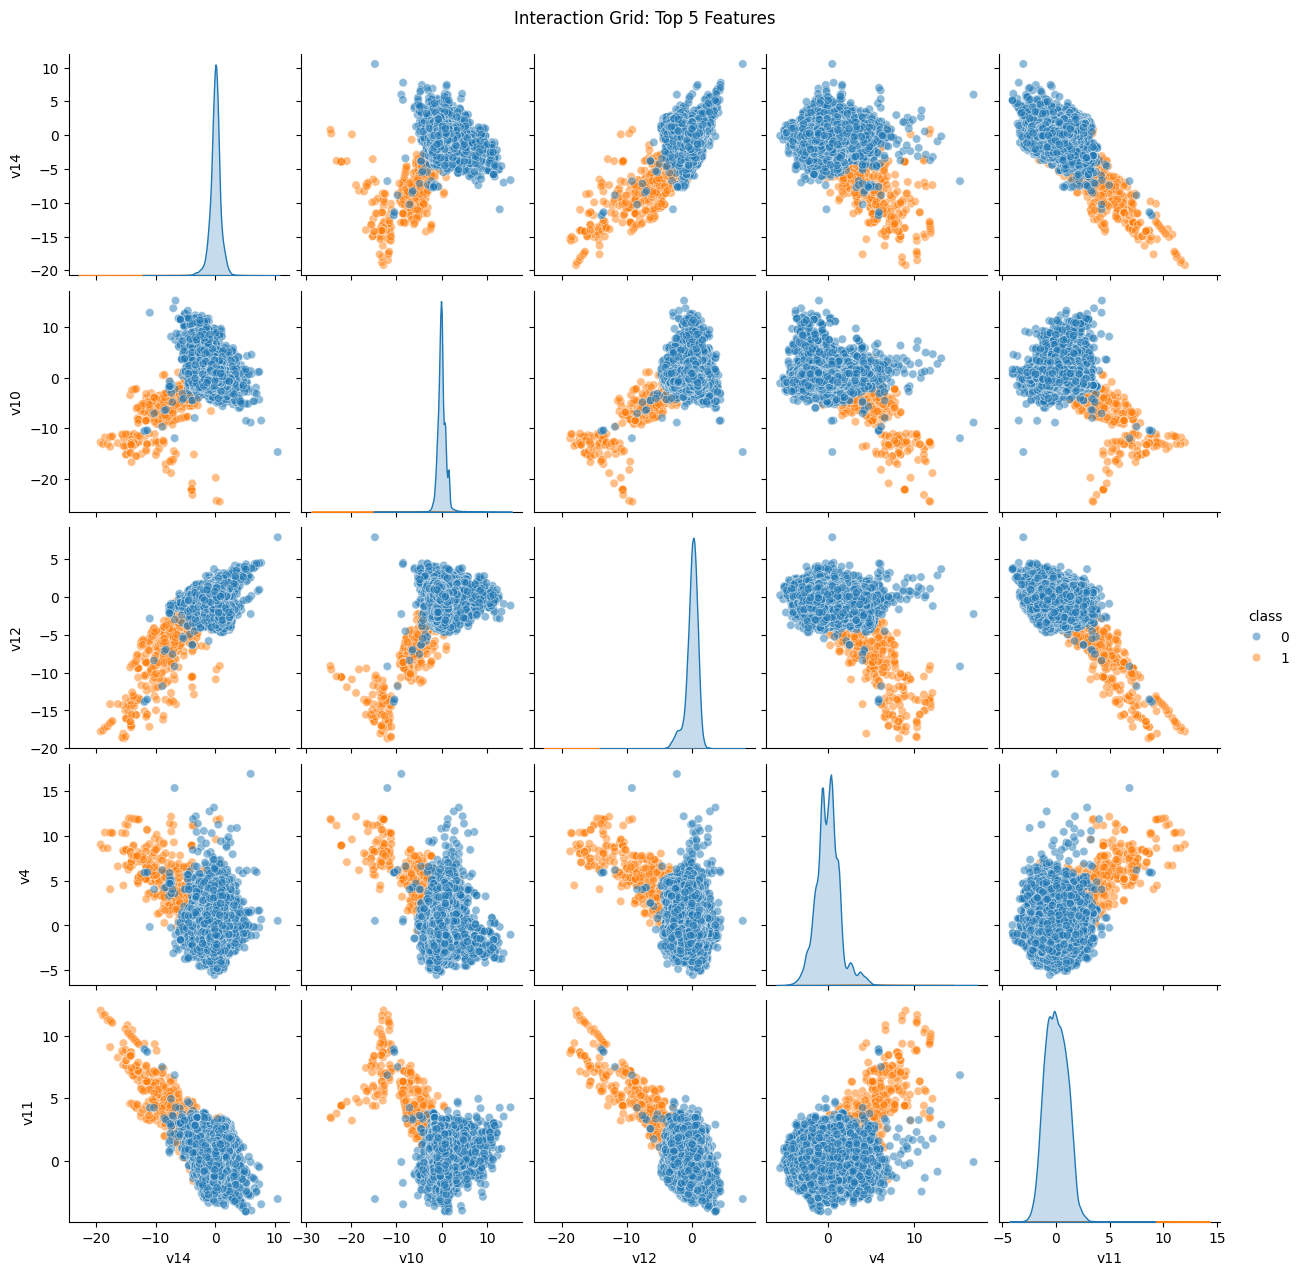

In [46]:
top_5_features = ['v14', 'v10', 'v12', 'v4', 'v11']

fraud = df[df['class'] == 1]
non_fraud = df[df['class'] == 0].sample(n=90000, random_state=42)
plot_df = pd.concat([fraud, non_fraud])

plt.figure(figsize=(12, 12))
sns.pairplot(
    data=plot_df,
    vars=top_5_features,      
    hue='class',              
    palette=['#1f77b4', '#ff7f0e'],
    plot_kws={'alpha': 0.5}, 
    diag_kind='kde'       
)
plt.suptitle('Interaction Grid: Top 5 Features', y=1.02) 
plt.show()


The most important interaction is between V4 and V14 when V14 pushes the fraud to the left (negative) and V4 pushes the fraud up (positive)

# 3.3 Data Structure Analysis

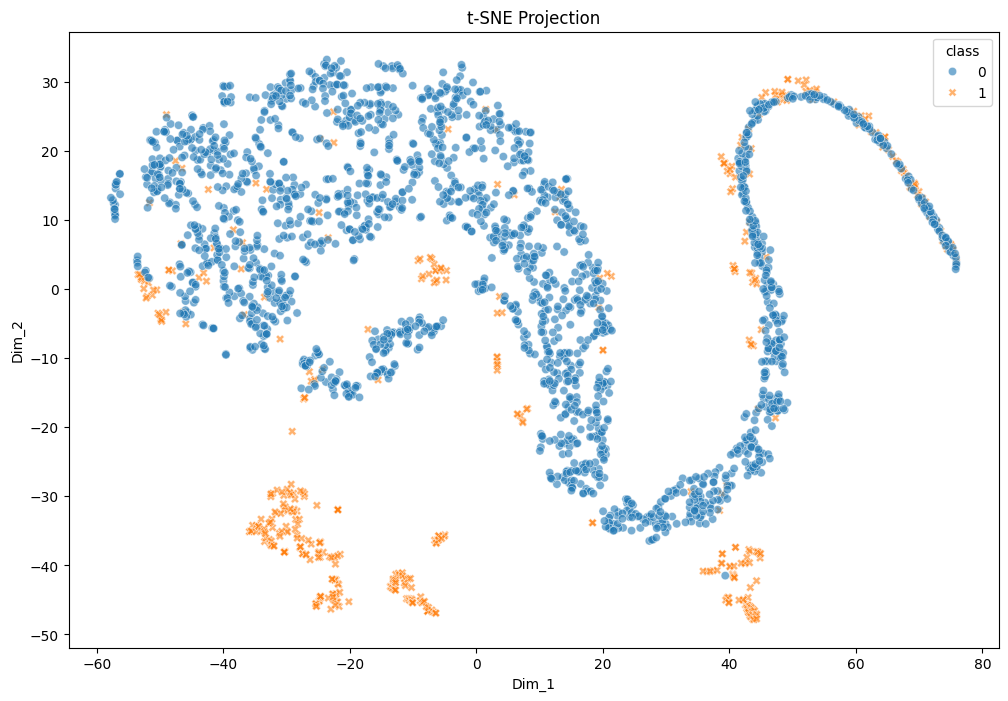

In [14]:
from sklearn.manifold import TSNE
import pandas as pd

fraud = df[df['class'] == 1]
non_fraud = df[df['class'] == 0].sample(n=2000, random_state=42)
sample_df = pd.concat([fraud, non_fraud])

X = sample_df.drop(['class', 'time'], axis=1) 
y = sample_df['class']

# Run t-SNE (This projects 29 dims -> 2 dims)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000, n_iter_without_progress=300)
X_embedded = tsne.fit_transform(X)

tsne_df = pd.DataFrame(data=X_embedded, columns=['Dim_1', 'Dim_2'])
tsne_df['class'] = y.values

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=tsne_df, 
    x='Dim_1', 
    y='Dim_2', 
    hue='class', 
    style='class', 
    palette=['#1f77b4', '#ff7f0e'],
    alpha=0.6
)
plt.title('t-SNE Projection')
plt.show()

Fraud forms distinct clusters, this suggest that un-supervised and non-linear models will work.

2026-01-08 17:05:18,021 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-01-08 17:05:18,024 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


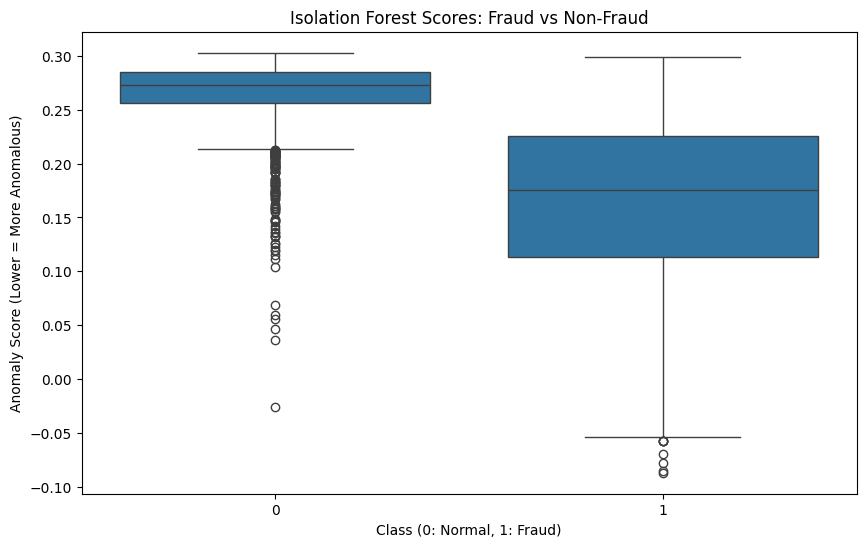

In [47]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

preds = iso_forest.fit_predict(X) 
scores = iso_forest.decision_function(X)

sample_df['anomaly_score'] = scores
sample_df['is_outlier'] = preds # -1 is outlier, 1 is normal

plt.figure(figsize=(10, 6))
sns.boxplot(data=sample_df, x='class', y='anomaly_score')
plt.title('Isolation Forest Scores: Fraud vs Non-Fraud')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Anomaly Score (Lower = More Anomalous)')
plt.show()

The Isolation Forest successfully isolated the fraud cases, anomaly_scores should be included as a feature